## Phase-Amplitude Coupling

The comodulogram is a matrix representing the strength of the coupling between the phase of driver frequencies and the amplitude of signal frequencies. The 'pac' method allows to extract pairs of driver/signal frequencies that exhibit higher scores of coupling

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


c:\Users\skite\miniconda3\envs\biotuner_env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  res = process_handler(cmd, _system_body)
c:\Users\skite\miniconda3\envs\biotuner_env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  res = process_handler(cmd, _system_body)
c:\Users\skite\miniconda3\envs\biotuner_env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  res = process_handler(cmd, _system_body)


[[np.float64(6.4), np.float64(43.0)], [np.float64(6.300000000000001), np.float64(43.0)], [np.float64(6.300000000000001), np.float64(46.0)], [np.float64(6.4), np.float64(44.0)], [np.float64(6.5), np.float64(34.0)], [np.float64(6.300000000000001), np.float64(45.0)], [np.float64(6.300000000000001), np.float64(44.0)], [np.float64(6.300000000000001), np.float64(47.0)], [np.float64(6.4), np.float64(47.0)], [np.float64(3.2), np.float64(44.0)], [np.float64(6.300000000000001), np.float64(42.0)], [np.float64(3.0), np.float64(15.0)], [np.float64(6.5), np.float64(31.0)], [np.float64(6.300000000000001), np.float64(41.0)], [np.float64(3.1), np.float64(40.0)], [np.float64(6.4), np.float64(48.0)], [np.float64(3.0), np.float64(16.0)], [np.float64(6.300000000000001), np.float64(48.0)], [np.float64(6.4), np.float64(42.0)], [np.float64(3.4), np.float64(43.0)], [np.float64(6.5), np.float64(32.0)], [np.float64(6.5), np.float64(35.0)], [np.float64(6.4), np.float64(46.0)], [np.float64(3.0), np.float64(14.0)],

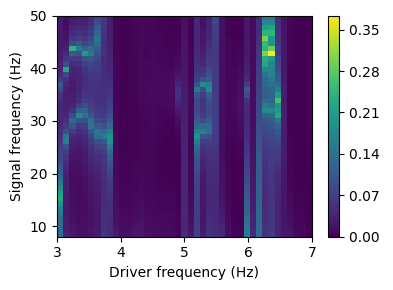

In [3]:
from biotuner.biotuner_object import compute_biotuner
!pip install pactools
import numpy as np
# load data
data = np.load('../data/EEG_example.npy')

biotuning = compute_biotuner(1000, data = data[10], peaks_function = 'harmonic_recurrence', precision = 0.1, n_harm = 10,
                    ratios_n_harms = 5, ratios_inc_fit = False, ratios_inc = True, scale_cons_limit = 0.1) # Initialize biotuner object
pac_freqs, _ = biotuning.pac(n_values = 30, plot=True, drive_precision = 0.1, max_drive_freq = 7, method = 'duprelatour')
print(pac_freqs)

Different methods can be used to compute the PAC:
methods = ['ozkurt', 'canolty', 'tort', 'penny', 'vanwijk', 'duprelatour', 'colgin',
    'sigl', 'bispectrum']

[[np.float64(3.4), np.float64(15.0)],
 [np.float64(3.4), np.float64(14.0)],
 [np.float64(3.4), np.float64(19.0)],
 [np.float64(3.1), np.float64(34.0)],
 [np.float64(3.1), np.float64(35.0)],
 [np.float64(3.1), np.float64(44.0)],
 [np.float64(3.4), np.float64(46.0)],
 [np.float64(3.1), np.float64(42.0)],
 [np.float64(3.4), np.float64(23.0)],
 [np.float64(3.1), np.float64(18.0)]]

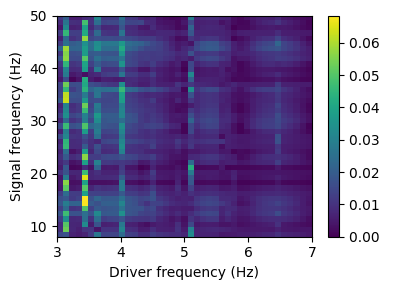

In [4]:
pac_freqs, _ = biotuning.pac(plot=True, drive_precision = 0.1, n_values = 10, max_drive_freq = 7, method = 'ozkurt')
pac_freqs

### Deriving tunings from PAC information

By computing the most frequent phase and amplitude frequencies from the 'pac_freqs' lists, we can derive a series of ratios by coupling each phase with each amplitude frequencies

In [5]:
from biotuner.biotuner_utils import pairs_most_frequent
pac_frequent = pairs_most_frequent(pac_freqs, 3)
pac_frequent

[[np.float64(18.0), np.float64(23.0), np.float64(42.0)],
 [np.float64(3.1), np.float64(3.4)]]

In [6]:
from biotuner.biotuner_utils import rebound
ratios = []
for i in range(len(pac_frequent[0])):
    for j in range(len(pac_frequent[1])):
        ratios.append(rebound(pac_frequent[0][i]/pac_frequent[1][j]))
        
ratios = sorted(ratios)
ratios

[np.float64(1.3235294117647058),
 np.float64(1.4516129032258065),
 np.float64(1.5441176470588236),
 np.float64(1.6911764705882353),
 np.float64(1.6935483870967742),
 np.float64(1.8548387096774193)]

Another approach to derive tuning based on the information of the Phase-Amplitude Coupling would be to compute the ratios of each pairs of phase/amplitude frequencies, and then to apply the 'scale_reduction' function to extract the most consonant intervals. This is what the pac_mode function does.

In [7]:
from biotuner.scale_construction import pac_mode
from biotuner.metrics import dyad_similarity
pac_mode(pac_freqs, n=6, function=dyad_similarity)

[np.float64(1.3709677419354838),
 np.float64(1.411290322580645),
 np.float64(1.4516129032258065),
 np.float64(1.6911764705882353),
 np.float64(1.6935483870967742),
 np.float64(1.7741935483870968)]

In [8]:
pac_mode(pac_freqs, n=10)

[np.float64(1.0294117647058825),
 np.float64(1.1029411764705883),
 np.float64(1.3709677419354838),
 np.float64(1.397058823529412),
 np.float64(1.411290322580645),
 np.float64(1.4516129032258065),
 np.float64(1.6911764705882353),
 np.float64(1.6911764705882353),
 np.float64(1.6935483870967742),
 np.float64(1.7741935483870968)]

#### Using coupled frequencies as generator interval

This code analyzes phase amplitude coupling (PAC) and constructs a musical scale based on the frequency ratios associated with the PAC. 

First, the code calculates the frequency ratio between the two oscillatory signals that exhibit PAC, stored in the `pac_freqs` variable. The frequency ratio is then converted to a rational number using the `sp.Rational()` function and its denominator is limited to 1000 using `.limit_denominator()`. 

Next, the code generates the Stern-Brocot interval associated with the rational number using `gen_interval_to_stern_brocot()`. The interval represents a sequence of fractions that converge to the rational number and is used to determine the generator interval tuning. A generator interval is a specific type of musical interval that can be used to generate a scale. 

The number of steps in the interval is limited to 16 using `.limit_denominator()`, and the generator interval tuning is calculated based on the interval and number of steps using `generator_interval_tuning()`. The resulting `gen_int_tuning` variable contains the musical scale based on the PAC frequency ratio, with `limit_steps` number of steps in the scale and an octave of 2. The tuning is generated by sorting the generator interval tuning in ascending order using `sorted()`.


In [9]:
# Import the necessary functions from the biotuner.scale_construction module
from biotuner.scale_construction import gen_interval_to_stern_brocot, generator_interval_tuning
import sympy as sp
from fractions import Fraction

# Calculate the frequency ratio between the two oscillatory signals that exhibit phase amplitude coupling (stored in pac_freqs variable) and convert it to a rational number with a denominator limited to 1000
ratio = rebound(pac_freqs[0][1]/pac_freqs[0][0])
print(sp.Rational(ratio).limit_denominator(1000))

# Set the limit on the number of steps in the interval to 16 and generate the Stern-Brocot interval based on the frequency ratio
limit_steps = 16
stern_brocot_ratio = gen_interval_to_stern_brocot(ratio)

# Limit the number of steps in the interval to 16 and calculate the steps needed for the generator interval tuning
steps = Fraction(stern_brocot_ratio).limit_denominator(16).denominator

# Calculate the generator interval tuning based on the interval and number of steps, and sort the tuning in ascending order
gen_int_tuning = sorted(generator_interval_tuning(interval = ratio, steps = steps, octave = 2))

# Store the resulting musical scale in the gen_int_tuning variable
gen_int_tuning


75/68


[[np.float64(1.0),
  np.float64(1.1029411764705883),
  np.float64(1.2164792387543255),
  np.float64(1.3417050427437414),
  np.float64(1.4798217383203032),
  np.float64(1.6321563290297463),
  np.float64(1.800172421723985)],
 [np.float64(1.0),
  np.float64(1.1029411764705883),
  np.float64(1.2164792387543255),
  np.float64(1.3417050427437414),
  np.float64(1.4798217383203032),
  np.float64(1.6321563290297463),
  np.float64(1.800172421723985)]]

### Deriving euclidian rhythms from PAC information

This code constructs a musical scale based on the phase amplitude coupling (PAC) frequencies and uses it to generate a consonant rhythmic pattern. The PAC scale is generated using the pac_mode() function and the consonant rhythmic pattern is generated using the consonant_euclid() function. The resulting rhythm is represented as a list of strings and can be played using the Euclidean rhythm. This code could be useful for creating music that is based on the natural rhythms of biological systems

In [10]:
# Import the necessary dictionaries and functions from the biotuner module
from biotuner.dictionaries import *
from biotuner.rhythm_construction import *

# Generate a musical scale based on the phase amplitude coupling (PAC) frequencies using the pac_mode() function
pac_scale = pac_mode(pac_freqs, 10, function=dyad_similarity)

# Generate a consonant Euclidean rhythm based on the PAC scale using the consonant_euclid() function
euclid_final, cons = consonant_euclid(pac_scale, n_steps_down = 3, limit_denom = 4, 
                                      limit_cons =1, limit_denom_final = 100)

# Generate a list of interval vectors based on the Euclidean rhythm
interval_vectors = [interval_vector(x) for x in euclid_final]

# Convert the list of interval vectors to a list of strings using the interval_vec_to_string() function
strings = interval_vec_to_string(interval_vectors)

# Convert the rhythmic pattern strings to their corresponding reference rhythms based on the dict_rhythms dictionary using the euclid_string_to_referent() function
euclid_referent = euclid_string_to_referent(strings, dict_rhythms)

# Store the resulting Euclidean rhythm, interval vectors, and reference rhythms in the euclid_final, interval_vectors, and euclid_referent variables, respectively
euclid_final, interval_vectors, euclid_referent


c:\Users\skite\miniconda3\envs\biotuner_env\Lib\fractions.py:712: RuntimeWarning: overflow encountered in scalar multiply
  self._denominator * other.numerator)


([[1, 0, 0],
  [1, 0, 0, 0],
  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
  [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
  [1, 1, 1, 0],
  [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0]],
 [[3], [4], [4, 4, 4], [3, 3, 3, 3], [1, 1, 2], [1, 1, 2, 1, 1, 2, 1, 1, 2]],
 ['None',
  'None',
  'None',
  'It is periodic with four repetitions of E(1,3) = [100]. It is the (12/8)-time Fandago clapping pattern in the Flamenco music of southern Spain, where 1 denotes a loud clap and 0 soft clap.',
  'It is the archetypal pattern of the Cumbia from Colombia, as well as a Calypso rhythm from Trinidad. It is also a thirteenth century Persian rhythm called Khalif-e-saghil, as well as the trochoid choreic rhythmic pattern of ancient Greece.',
  'None'])